In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np

data=np.load("/content/drive/MyDrive/Datanewemo.npy")
target=np.load("/content/drive/MyDrive/Targetnewemo.npy")

In [ ]:
data.shape

(28709, 64, 64, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape=data.shape[1:]),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(1024,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(7,activation='softmax')
]
)


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data,target,test_size=0.4)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 512)       5120      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 512)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 128)       589952    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)        

In [ ]:
X_train.shape

(17225, 64, 64, 1)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint=ModelCheckpoint('/content/drive/MyDrive/model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(X_train,Y_train,epochs=30,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/30
431/431 [==============================] - 1226s 3s/step - loss: 1.8200 - accuracy: 0.2439 - val_loss: 1.7736 - val_accuracy: 0.2322
Epoch 2/30
431/431 [==============================] - 1239s 3s/step - loss: 1.7025 - accuracy: 0.3086 - val_loss: 1.6118 - val_accuracy: 0.3713
Epoch 3/30
431/431 [==============================] - 1241s 3s/step - loss: 1.5788 - accuracy: 0.3792 - val_loss: 1.5078 - val_accuracy: 0.4113
Epoch 4/30
431/431 [==============================] - 1241s 3s/step - loss: 1.4907 - accuracy: 0.4160 - val_loss: 1.4878 - val_accuracy: 0.4308
Epoch 5/30
431/431 [==============================] - 1216s 3s/step - loss: 1.4221 - accuracy: 0.4424 - val_loss: 1.4655 - val_accuracy: 0.4522
Epoch 6/30
431/431 [==============================] - 1216s 3s/step - loss: 1.3627 - accuracy: 0.4705 - val_loss: 1.3765 - val_accuracy: 0.4595
Epoch 7/30
431/431 [==============================] - 1224s 3s/step - loss: 1.3041 - accuracy: 0.4984 - val_loss: 1.3952 - val_accuracy:

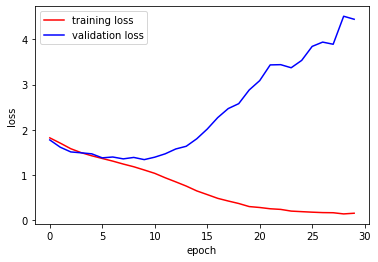

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

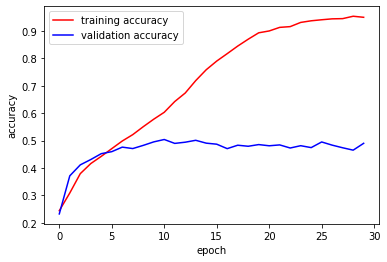

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],'b',label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(X_test,Y_test))

359/359 [==============================] - 261s 726ms/step - loss: 4.6035 - accuracy: 0.4725
[4.60347843170166, 0.47248345613479614]
